Here, I'll be exploring the simulation of Geometric Brownian Motion (GBM) in Python. GBM $S$ is characterized by an initial value, $S_0 > 0$ ​ and its dynamics are described by the following Stochastic Differential Equation (SDE):

$
dS_t = \mu S_t dt + \sigma S_t dW_t
$

Where:
- $S_t$ represents the value of the process at time $t$.
- $\mu$ is the drift (drift rate) of the process.
- $\sigma$ is the volatility (diffusion rate) of the process.
- $dW_t$ represents the Wiener process (Brownian motion) increment.
- $dt$ is the differential time increment.

This SDE is a fundamental equation in finance and is often used to model the behavior of financial assets and other dynamic processes.


The integrated form of Geometric Brownian Motion (GBM):

1. Logarithmic Transformation:
   $
   \log(S_t) = \log(S_0) + \int_{0}^{t} \left(\mu - \frac{\sigma^2}{2}\right) ds + \int_{0}^{t} \sigma dW_s
   $

2. Simplified Logarithmic Form:
   $
   \log(S_t) = \log(S_0) + \left(\mu - \frac{\sigma^2}{2}\right) t + \sigma W_t
   $

3. Log-Normal Distribution:
   $
   \log(S_t) \sim \mathcal{N}\left(\log(S_0) + \left(\mu - \frac{\sigma^2}{2}\right) t, \sigma^2 t\right)
   $

The explicit expression:

# $S_t = S_0 e^{(\mu - \frac{\sigma^2}{2}) t + \sigma  W_t}$

The combination of the deterministic and stochastic components defines how the process evolves over time. The exponentiation of this combined component is used to model the exponential growth or decay of the process and is a key feature of GBM.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# Parameters
# drift coefficent
mu = 0.1
# number of steps
n = 100
# time in years
T = 1
# number of sims
M = 100
# initial stock price
S0 = 100
# volatility
sigma = 0.3

We have two alternatives at our disposal. We can either: 
- Follow the first approach, which involves directly simulating the stock price at each time step and multiplying the exponential terms together along the entire simulation.
- Opt for the second approach, where we simulate the log-normal distribution and cumulatively add the terms across each sample path.

In [3]:
# calc each time step
dt = T/n
# simulation using numpy arrays
St = np.exp(
    (mu - sigma ** 2 / 2) * dt
    + sigma * np.random.normal(0, np.sqrt(dt), size=(M,n)).T
)
# include array of 1's
St = np.vstack([np.ones(M), St])
# multiply through by S0 and return the cumulative product of elements along a given simulation path (axis=0). 
St = S0 * St.cumprod(axis=0)

Consider time intervals in years

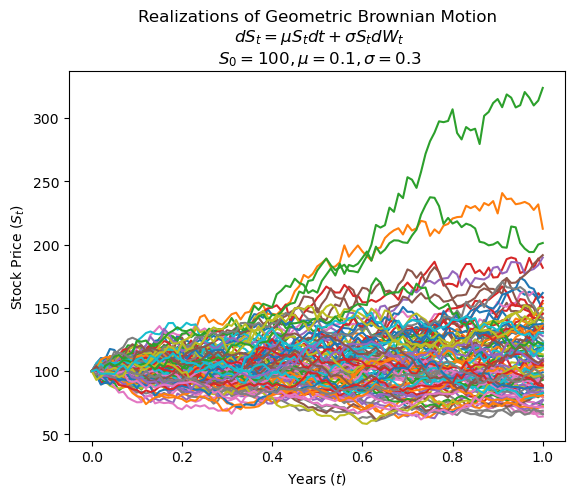

In [4]:
# Define time interval correctly 
time = np.linspace(0,T,n+1)
# Require numpy array that is the same shape as St
tt = np.full(shape=(M,n+1), fill_value=time).T
plt.plot(tt, St)
plt.xlabel("Years $(t)$")
plt.ylabel("Stock Price $(S_t)$")
plt.title(
    "Realizations of Geometric Brownian Motion\n $dS_t = \mu S_t dt + \sigma S_t dW_t$\n $S_0 = {0}, \mu = {1}, \sigma = {2}$".format(S0, mu, sigma)
)
plt.show()